In [1]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw4/retail_transactions.csv') 

In [2]:
df.isnull().sum(axis=0)

2010 revenue                 3453
days_since_first_purchase    3453
days_since_last_purchase     3453
number_of_purchase           3453
avg_order_cost               3453
2011 revenue                  119
dtype: int64

In [3]:
#1. 刪除有空值的資料以及根據 2010/2011 revenue 刪除 outliers，此處 outliers 的定 義為大於中位數 3 個標準差。(請在刪除 outlier 前先算好中位數、標準差)(3%)
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
0,711.79,23.0,23.0,1.0,711.79,3598.21
1,892.80,14.0,14.0,1.0,892.80,904.44
2,1868.02,16.0,13.0,2.0,934.01,1677.67
3,1001.52,10.0,10.0,1.0,1001.52,626.60
4,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...
761,653.20,29.0,22.0,2.0,326.60,6623.70
762,438.10,28.0,28.0,1.0,438.10,1123.51
763,365.73,11.0,11.0,1.0,365.73,2201.33
764,376.30,22.0,22.0,1.0,376.30,1962.30


In [4]:
#1. 刪除有空值的資料以及根據 2010/2011 revenue 刪除 outliers，此處 outliers 的定 義為大於中位數 3 個標準差。(請在刪除 outlier 前先算好中位數、標準差)(3%)
import statistics
med0=statistics.median(df['2010 revenue'])
med1=statistics.median(df['2011 revenue'])
std0=statistics.stdev(df['2010 revenue'])
std1=statistics.stdev(df['2011 revenue'])

for i in range(len(df)):
    a=df.at[i,'2010 revenue']
    b=df.at[i,'2011 revenue']   
    if a>(med0+std0*3) or a<(med0-std0*3) or b>(med1+std1*3) or b<(med1-std1*3):
        df.drop([i],axis=0,inplace=True)
df             

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
0,711.79,23.0,23.0,1.0,711.79,3598.21
1,892.80,14.0,14.0,1.0,892.80,904.44
2,1868.02,16.0,13.0,2.0,934.01,1677.67
3,1001.52,10.0,10.0,1.0,1001.52,626.60
4,600.72,8.0,8.0,1.0,600.72,1249.84
...,...,...,...,...,...,...
761,653.20,29.0,22.0,2.0,326.60,6623.70
762,438.10,28.0,28.0,1.0,438.10,1123.51
763,365.73,11.0,11.0,1.0,365.73,2201.33
764,376.30,22.0,22.0,1.0,376.30,1962.30


In [5]:
#2. 計算各屬性與 target output (2011 revenue)的相關係數(2%)，請寫出與 output 最 相關和最不相關的屬性(2%)，
df.corr()['2011 revenue'].sort_values()
#A:最相關為2010 revenue;最不相關為days_since_first_purchase

days_since_last_purchase    -0.187574
days_since_first_purchase    0.058347
number_of_purchase           0.386995
avg_order_cost               0.423471
2010 revenue                 0.607168
2011 revenue                 1.000000
Name: 2011 revenue, dtype: float64

In [6]:
#並刪除與 output 無關的屬性(相關係數< |0.1|)(2%)。
df.drop('days_since_first_purchase',axis=1,inplace=True)
df

,2010 revenue,days_since_last_purchase,number_of_purchase,avg_order_cost,2011 revenue
0,711.79,23.0,1.0,711.79,3598.21
1,892.80,14.0,1.0,892.80,904.44
2,1868.02,13.0,2.0,934.01,1677.67
3,1001.52,10.0,1.0,1001.52,626.60
4,600.72,8.0,1.0,600.72,1249.84
...,...,...,...,...,...
761,653.20,22.0,2.0,326.60,6623.70
762,438.10,28.0,1.0,438.10,1123.51
763,365.73,11.0,1.0,365.73,2201.33
764,376.30,22.0,1.0,376.30,1962.30


In [7]:
#3. 使用 sklearn 的 train_test_split(random_state=15)函數將資料分為訓練集與測試 集，比例為 67%:33%。(2%)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x=df[['2010 revenue','days_since_last_purchase','number_of_purchase','avg_order_cost']]
y=df[['2011 revenue']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

In [8]:
#4. 使用 sklearn 及訓練集建立 LinearRegression 模型。(15%)
#訓練模型
lr = LinearRegression()  
lr.fit(x_train, y_train) 

#5. 印出模型中的係數和截距(5%)，並還原此 linear equation(2%)。

# 印出係數
a=lr.coef_
print("係數：",a[0][0])

# 印出截距
b=lr.intercept_
print("截距：",b[0])

#linear equation
print(a[0][0],'*','2010 revenue','+',a[0][1],'*','days_since_last_purchase','+',a[0][2],'*','number_of_purchase','+',a[0][3],'*','avg_order_cost','+',b[0])

係數： 5.6711958533191655
截距： 453.9568698363396
5.6711958533191655 * 2010 revenue + 23.651721584893227 * days_since_last_purchase + 99.96126977845466 * number_of_purchase + -2.459428616236003 * avg_order_cost + 453.9568698363396


In [9]:
#6. (a) 預測測試集中的顧客在 2011 年的消費(5%)，
y_pred = lr.predict(x_test)
print(y_pred)

[[ 4870.0394277 ]
 [ 1128.42996303]
 [ 1170.81940233]
 [ 1551.27491102]
 [ 2910.27389203]
 [ 1454.89566447]
 [ 2098.8549955 ]
 [ 2149.44032949]
 [ 2051.275608  ]
 [ 6850.990046  ]
 [ 4291.28599986]
 [ 2092.04445144]
 [17842.69113121]
 [ 2040.40083179]
 [ 4725.27060928]
 [ 1966.12710857]
 [ 2622.80503786]
 [ 2640.01140472]
 [ 2027.38728625]
 [ 2331.0015314 ]
 [ 6933.03199943]
 [ 2569.8095402 ]
 [ 3502.83498474]
 [ 1674.18924318]
 [  976.83321118]
 [ 1438.56088395]
 [ 2306.1221972 ]
 [ 1383.27780506]
 [ 1756.81623773]
 [ 1653.60904168]
 [ 1893.85833097]
 [ 5305.8380371 ]
 [ 2050.1017071 ]
 [ 2034.66220664]
 [ 3727.43858192]
 [ 1892.77034488]
 [ 2375.07869526]
 [ 1251.68126315]
 [ 2624.55116864]
 [ 1237.1935164 ]
 [ 1764.41501136]
 [ 2461.90799476]
 [ 3651.32803964]
 [ 1559.33243202]
 [ 2361.2065964 ]
 [ 1579.87596587]
 [ 2280.93596841]
 [ 1937.77175384]
 [ 1390.41381656]
 [ 1458.07129927]
 [ 9824.91392961]
 [ 2879.70118444]
 [ 1709.85496447]
 [ 3602.03131327]
 [ 1857.39567288]
 [ 3879.98

In [10]:
#(b) 印出模型在測試資料的 RMSE(root mean squared error)和 MAE(mean absolute error)(3%)。
from sklearn import metrics
#MAE
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
#RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  2174.6222458950265
RMSE:  3682.9460715253795


In [11]:
pd.set_option('display.width',1000)
df1 = pd.read_csv('/Users/xwlee/Desktop/ECt/hw4/exam_score.csv') 
df1

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [12]:
#7. 使用 sklearn 的 train_test_split(random_state=1)將資料分成訓練集與測試集，比 例為(7:3) (2%)。
x=df1[['0','1']]
y=df1[['2']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#8. (a) 使用 sklearn 及訓練集建立 LogisticRegression 模型(15%)，
# 建立模型
from sklearn import linear_model
lgr = linear_model.LogisticRegression()
lgr.fit(x_train, y_train.values.ravel())

#(b) 印出模型對訓練資料的準確率(Accuracy) (3%)。
# 計算準確率
accuracy = lgr.score(x_train, y_train)
print("Accuracy on training data is: ",accuracy)

Accuracy on training data is:  0.9285714285714286


In [13]:
x_train.reset_index(inplace=True)
x_train.drop(['index'],axis=1,inplace=True)

/Users/xwlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


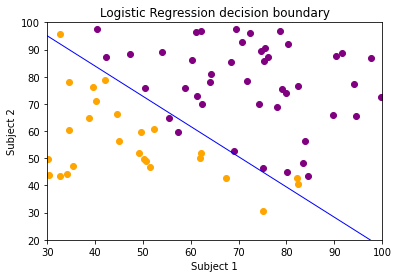

In [14]:
#9. 請視覺化此模型對訓練資料的分類，如下圖所示。(圖中須能區分出不同類型的資料 點) (10%)
# 繪圖
import matplotlib.pyplot as plt
# Retrieve the model parameters.
b = lgr.intercept_[0]
w1, w2 = lgr.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
# Plot the data and the classification with the decision boundary.
xmin, xmax = 30, 100
ymin, ymax = 20, 100
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1,c="blue")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('Subject 2')
plt.xlabel('Subject 1')
plt.title('Logistic Regression decision boundary')

for i in range(len(y_train)):
    if y_train['2'].iloc[i]==0:
        plt.scatter(x_train['0'].iloc[i],x_train['1'].iloc[i],c="orange")
    else:
        plt.scatter(x_train['0'].iloc[i],x_train['1'].iloc[i],c="purple")
plt.show()

In [15]:
#10. (a) 使用模型對測試集做預測(2%)，
y_pred = x_test
predicted = lgr.predict(y_pred)
print(predicted)

[1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0]


In [16]:
#(b)印出模型預測的準確率(Accuracy) (2%)。
accuracy = lgr.score(x_test,y_test)
print("Accuracy on test data is: ",accuracy)

Accuracy on test data is:  0.8666666666666667


In [17]:
#11. 有一個新學生兩個科目的分數分別為45、80分，請預測此學生這學期是否能及格(3%)，
student_to_be_pred = np.array([[45, 80]])
predicted = lgr.predict(student_to_be_pred)

if predicted == 1 :
    print("Pass")
else:
    print("Failed")
    
#模型預測此學生能及格的機率為多少(2%)。
lgr.predict_proba(student_to_be_pred)
print("及格機率為",lgr.predict_proba(student_to_be_pred)[0][1])

Pass
及格機率為 0.6051144940173673
